## 1. Using the Streamlit URL endpoint to make predictions

In [11]:
import requests
import json

endpoint_url = "http://localhost:8503/predict"

def make_prediction(text):
    payload = {
        "text": text
    }
    
    headers = {
        "Content-Type": "application/json"
    }
    
    response = requests.post(endpoint_url, json=payload, headers=headers)
  
    if response.status_code == 200:
        predictions = response.json().get("predictions", [])
        return predictions
    else:
        print(f"Error: {response.status_code}, {response.text}")
        return None

text = [
    "Abbreviations : GEMS , Global Enteric Multicenter Study ; VIP , ventilated improved pit ..",
    "Fractions from FPLC purification were treated with Laemmli buffer [ 82 ] with 10 mM 1,4 - dithiothreitol ( DTT ) and heated for 5 m at 85 ° C then analyzed on a 4 % to 15 % discontinuous SDS gel with a 6 % stacking gel run at ambient temperature at a constant 100 V.",
    "Two epithelial cytokines other than IL33 , IL25 , and thymic stromal lymphopoietin ( TSLP ) are known to activate ILC2 in the lung [ 22,24 ] ..",
    "We developed a variant of gene set enrichment analysis ( GSEA ) to determine whether a genetic pathway shows evidence for age regulation [ 23 ] ..",
    "Red represents samples having the normalized pY232 and/or pY291 values in cancer tissues ≥ 1.1 folds of normal tissues ( of which enhanced pY232 and/or pY291 level may be indicative of dominant survival mode of Fas signaling ) ; blue represents samples having both normalized pY232 and pY291 values < 1.1 ( of which pY232 and pY291 levels less than or equal to normal may be indicative of the apoptosis - ready mode of Fas signaling ) ..",
    "( D ) Lysates of rectal cancer tissues before and after radiotherapy ( RT ) from each of the nine patients were subjected to SDS - PAGE and immunoblotting with antibodies against pY232 , pY291 , and C - terminal ( C - ter ) of Fas ..",
    "Relative risks ( RRs ) with 95 % confidence intervals ( CIs ) are reported ..",
    "Increasing concentrations of the p53 activators significantly decrease the levels of SOD1G85R but not the endogenous WTSOD1 proteins in western blots of both supernatant and pellet fractions ..",
    "( B ) A decrease in p53 as the result of shRNA knockdown increases the levels of SOD1G85R but not WT SOD1 proteins in the SOD1G85R aggregation assay , as shown by western blots of both supernatant ( S ) ( n = 2 ) and pellet ( P ) ( n = 3 ) fractions ..",
    "( C ) A complete absence of p53 increases the accumulation of SOD1G85R mutant proteins in p53–/ – HCT116 cells when compared with controls ..",
    "Pravastatin sodium ( PSS , Fig 2.9 ) is the only included NP of microbial origin ..",
    "I have read the journal 's policy and the authors of this manuscript have the following competing interests : DF , EJ , and NNL are staff members of the World Health Organization ( WHO ) ..",
    "Characteristics were compared across the matched groups using standardized mean differences ( SMDs ) , with an SMD > 0.1 indicating a clinically important difference ..",
    "Nutrients that are rich in seafood were selected to be included this study : protein , eicosapentaenoic acid ( EPA ) and docosahexaenoic acid ( DHA ) , vitamins ( A , D , B12 , and niacin ) , and minerals ( zinc and selenium , and iron ) ..",
    "To test if this polymorphism modulates CD24 mRNA stability , we constructed two plasmids ( pTracer CMV2 - CD24TG and pTracer CMV2 - CD24del ; Figure 5 , top panel ) and transfected Chinese hamster ovary ( CHO ) cells with the two constructs ..",
    "Blood pressure ( BP ) will be controlled after each visit .."
]
for sentence in text:
    prediction = make_prediction(sentence)
    if prediction:
        print("Prediction:", prediction)
    else:
        print("No prediction received.")

Prediction: ['I-LF', 'B-AC', 'I-LF', 'I-LF', 'I-LF', 'B-AC', 'B-O', 'B-O', 'B-LF', 'I-LF', 'B-AC', 'B-AC', 'B-LF', 'B-LF', 'I-LF']
Prediction: ['B-O', 'B-AC', 'I-LF', 'B-O', 'I-LF', 'B-AC', 'B-LF', 'B-O', 'B-LF', 'B-LF', 'B-AC', 'B-AC', 'B-LF', 'B-LF', 'I-LF', 'B-AC', 'I-LF', 'B-LF', 'B-LF', 'B-O', 'B-O', 'I-LF', 'B-O', 'I-LF', 'B-LF', 'B-LF', 'I-LF', 'B-O', 'B-O', 'B-AC', 'B-LF', 'B-LF', 'I-LF', 'B-LF', 'B-AC', 'B-O', 'B-LF', 'B-LF', 'B-LF', 'B-LF', 'B-AC', 'B-O', 'I-LF', 'B-O', 'B-O', 'I-LF', 'I-LF', 'B-O', 'I-LF', 'I-LF']
Prediction: ['I-LF', 'B-AC', 'I-LF', 'B-O', 'I-LF', 'B-AC', 'B-O', 'B-O', 'B-LF', 'B-LF', 'B-AC', 'B-AC', 'B-LF', 'B-LF', 'I-LF', 'B-AC', 'I-LF', 'B-LF', 'B-LF', 'B-O', 'B-O', 'I-LF', 'B-O', 'I-LF', 'B-LF', 'B-LF', 'I-LF', 'B-O']
Prediction: ['B-O', 'B-AC', 'I-LF', 'I-LF', 'I-LF', 'B-AC', 'B-O', 'B-O', 'B-LF', 'I-LF', 'B-AC', 'B-AC', 'B-LF', 'B-LF', 'I-LF', 'B-AC', 'I-LF', 'B-AC', 'B-LF', 'B-O', 'B-O', 'I-LF', 'B-O', 'I-LF', 'B-LF', 'B-LF', 'I-LF']
Prediction: ['I-

## 2. Stretch Testing
### a. Defining the test request

In [8]:
import requests
import time
from concurrent.futures import ThreadPoolExecutor
import matplotlib.pyplot as plt

# URL of the FastAPI app endpoint hosted by our Streamlit app
endpoint_url = "http://localhost:8503/predict"
text = "Abbreviations: GEMS, Global Enteric Multicenter Study; VIP, ventilated improved pit."

def make_request(_):
    payload = {"text": text}
    headers = {"Content-Type": "application/json"}
    response = requests.post(endpoint_url, json=payload, headers=headers)
    return response.status_code, response.elapsed.total_seconds()

### b. Evaluating the performance of the endpoint using Thread Pool Executor

Total requests: 100
Successful requests: 100
Failed requests: 0
Average response time: 1.27 seconds
Total time: 2.57 seconds


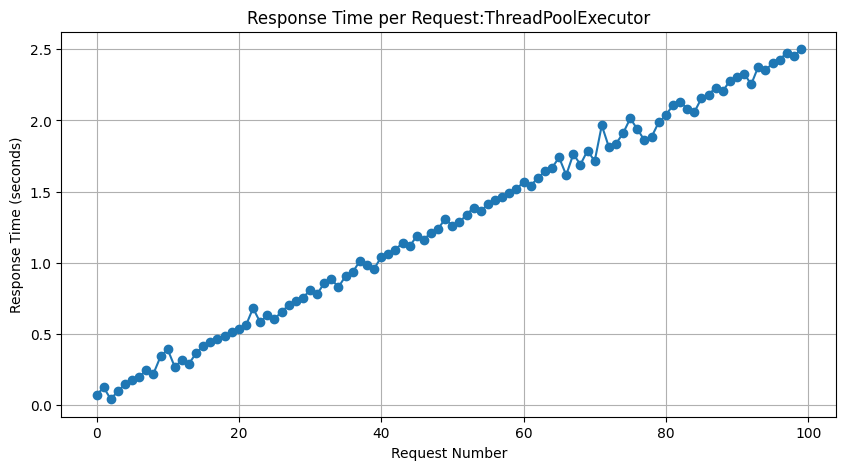

In [9]:
# Performing stress testing with 100 concurrent requests using threadPoolExecuter
num_requests = 100
response_times = []

with ThreadPoolExecutor(max_workers=num_requests) as executor:
    start_time_thread = time.time()
    results_thread = list(executor.map(make_request, range(num_requests)))
    end_time_thread = time.time()

# Analyzing results
statuses_thread, times_thread = zip(*results_thread)

success_count_thread = statuses_thread.count(200)
fail_count_thread = len(statuses_thread) - success_count_thread
avg_response_time_thread = sum(times_thread) / len(times_thread)
response_times_thread = list(times_thread)

# Printing the results
print(f"Total requests: {num_requests}")
print(f"Successful requests: {success_count_thread}")
print(f"Failed requests: {fail_count_thread}")
print(f"Average response time: {avg_response_time_thread:.2f} seconds")
print(f"Total time: {end_time_thread - start_time_thread:.2f} seconds")

# Plotting the response times
plt.figure(figsize=(10, 5))
plt.plot(response_times_thread, marker='o')
plt.xlabel('Request Number')
plt.ylabel('Response Time (seconds)')
plt.title('Response Time per Request:ThreadPoolExecutor')
plt.grid(True)
plt.show()

### c. Evaluating the performance of the endpoint using Custom Loop

Total requests: 100
Successful requests: 100
Failed requests: 0
Average response time: 2.11 seconds
Total time: 210.99 seconds


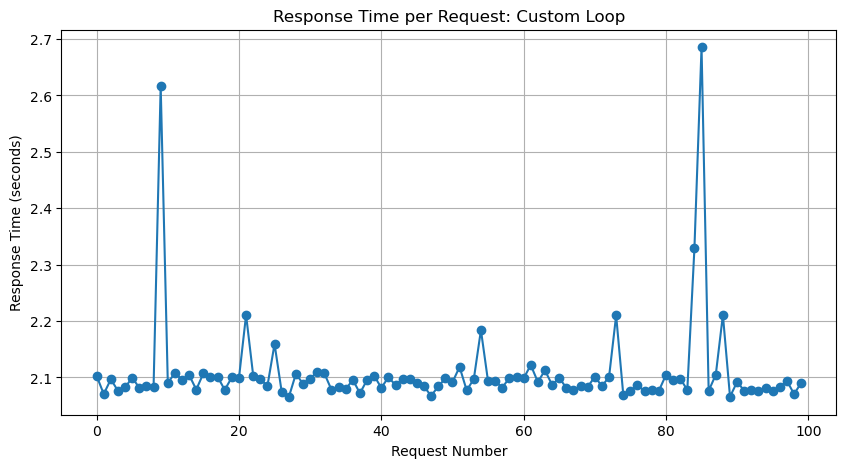

In [4]:
# Performing stress testing with 100 requests using a custom loop
num_requests = 100
response_times_custom = []
statuses = []

start_time_custom = time.time()
for _ in range(num_requests):
    status_code, elapsed_time = make_request(_)
    statuses.append(status_code)
    response_times_custom.append(elapsed_time)
end_time_custom = time.time()

# Analyzing results
success_count = statuses.count(200)
fail_count = len(statuses) - success_count
avg_response_time = sum(response_times_custom) / len(response_times_custom)

# Printing the results
print(f"Total requests: {num_requests}")
print(f"Successful requests: {success_count}")
print(f"Failed requests: {fail_count}")
print(f"Average response time: {avg_response_time:.2f} seconds")
print(f"Total time: {end_time_custom - start_time_custom:.2f} seconds")

# Plotting the response times
plt.figure(figsize=(10, 5))
plt.plot(response_times_custom, marker='o')
plt.xlabel('Request Number')
plt.ylabel('Response Time (seconds)')
plt.title('Response Time per Request: Custom Loop')
plt.grid(True)
plt.show()

### d. Evaluating the performance of the endpoint using custom loop for 200 requests

Total requests: 200
Successful requests: 0
Failed requests: 200
Average response time: 0.00 seconds
Total time: 0.31 seconds


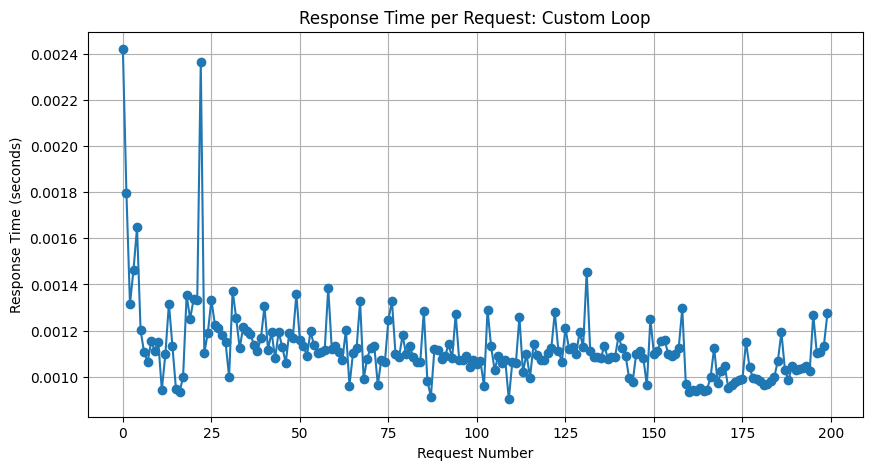

In [33]:
# Performing stress testing with 200 requests using a custom loop
num_requests = 200
response_times_custom = []
statuses = []

start_time_custom = time.time()
for _ in range(num_requests):
    status_code, elapsed_time = make_request(_)
    statuses.append(status_code)
    response_times_custom.append(elapsed_time)
end_time_custom = time.time()

# Analyzing results
success_count = statuses.count(200)
fail_count = len(statuses) - success_count
avg_response_time = sum(response_times_custom) / len(response_times_custom)

# Printing the results
print(f"Total requests: {num_requests}")
print(f"Successful requests: {success_count}")
print(f"Failed requests: {fail_count}")
print(f"Average response time: {avg_response_time:.2f} seconds")
print(f"Total time: {end_time_custom - start_time_custom:.2f} seconds")

# Plotting the response times
plt.figure(figsize=(10, 5))
plt.plot(response_times_custom, marker='o')
plt.xlabel('Request Number')
plt.ylabel('Response Time (seconds)')
plt.title('Response Time per Request: Custom Loop')
plt.grid(True)
plt.show()

### e. Evaluating the performance of the endpoint using Thread Pool Executor for 200 requests

Total requests: 200
Successful requests: 0
Failed requests: 200
Average response time: 0.01 seconds
Total time: 0.17 seconds


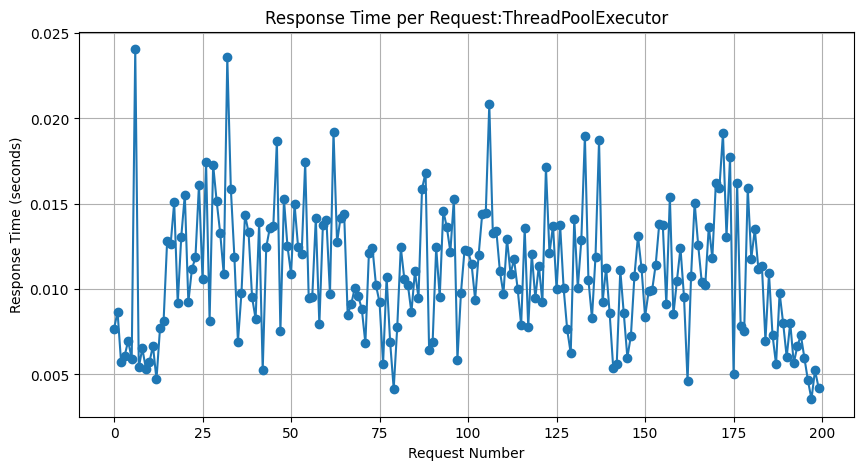

In [34]:
# Performing stress testing with 200 concurrent requests using threadPoolExecuter
num_requests = 200
response_times = []

with ThreadPoolExecutor(max_workers=num_requests) as executor:
    start_time_thread = time.time()
    results_thread = list(executor.map(make_request, range(num_requests)))
    end_time_thread = time.time()

# Analyzing results
statuses_thread, times_thread = zip(*results_thread)
success_count_thread = statuses_thread.count(200)
fail_count_thread = len(statuses_thread) - success_count_thread
avg_response_time_thread = sum(times_thread) / len(times_thread)
response_times_thread = list(times_thread)

# Printing the results
print(f"Total requests: {num_requests}")
print(f"Successful requests: {success_count_thread}")
print(f"Failed requests: {fail_count_thread}")
print(f"Average response time: {avg_response_time_thread:.2f} seconds")
print(f"Total time: {end_time_thread - start_time_thread:.2f} seconds")

# Plotting the response times
plt.figure(figsize=(10, 5))
plt.plot(response_times_thread, marker='o')
plt.xlabel('Request Number')
plt.ylabel('Response Time (seconds)')
plt.title('Response Time per Request:ThreadPoolExecutor')
plt.grid(True)
plt.show()